In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import models, layers, utils

In [2]:
# Data Loading and Preprocessing
def loading_preprocessing(path):
    img_list = []
    for img_path in os.listdir(path):
        img = cv2.imread(path +'/' + img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(225,225))
        img = img/255
        img_list.append(img )
    return img_list

In [3]:
train_normal = loading_preprocessing('E:/After Graduate/Electropi/Image/Face recognition/Medical Image Analysis with CNN/chest_xray/train/NORMAL')
train_pneumonia = loading_preprocessing('E:/After Graduate/Electropi/Image/Face recognition/Medical Image Analysis with CNN/chest_xray/train/PNEUMONIA')

train_list = train_normal+ train_pneumonia
train_labels = [0]*len(train_normal) + [1]*len(train_pneumonia)
train_label_name = ['Normal']*len(train_normal) + ['Pneumonia']*len(train_pneumonia)

print('length of inputs: ',len(train_list))
print('length of outputs: ',len(train_labels))

length of inputs:  5216
length of outputs:  5216


In [4]:
test_normal = loading_preprocessing('E:/After Graduate/Electropi/Image/Face recognition/Medical Image Analysis with CNN/chest_xray/test/NORMAL')
test_pneumonia = loading_preprocessing('E:/After Graduate/Electropi/Image/Face recognition/Medical Image Analysis with CNN/chest_xray/test/PNEUMONIA')

test_list = test_normal+ test_pneumonia
test_labels = [0]*len(test_normal) + [1]*len(test_pneumonia)
test_label_name = ['Normal']*len(test_normal) + ['Pneumonia']*len(test_pneumonia)

print('length of inputs: ',len(test_list))
print('length of outputs: ',len(test_labels))

length of inputs:  624
length of outputs:  624


In [5]:
def load_array_in_chunks(img_list, chunk_size=1000):
    """Loads a list of images into a NumPy array in chunks.

    Args:
        img_list: A list of images.
        chunk_size: The size of each chunk.

    Returns:
        A NumPy array containing all of the images in the list.
    """

    X_train = np.empty((0, 225, 225, 3), dtype=np.float32)
    for i in range(0, len(img_list), chunk_size):
        chunk = img_list[i:i + chunk_size]
        X_chunk = np.array(chunk, dtype=np.float32)
        X_train = np.concatenate((X_train, X_chunk), axis=0)
    return X_train

In [6]:
X_train = load_array_in_chunks(train_list)
X_train

array([[[[0.09411765, 0.09411765, 0.09411765],
         [0.07843138, 0.07843138, 0.07843138],
         [0.07843138, 0.07843138, 0.07843138],
         ...,
         [0.36862746, 0.36862746, 0.36862746],
         [0.36862746, 0.36862746, 0.36862746],
         [0.37254903, 0.37254903, 0.37254903]],

        [[0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.35686275, 0.35686275, 0.35686275],
         [0.37254903, 0.37254903, 0.37254903],
         [0.37254903, 0.37254903, 0.37254903]],

        [[0.09411765, 0.09411765, 0.09411765],
         [0.08235294, 0.08235294, 0.08235294],
         [0.07843138, 0.07843138, 0.07843138],
         ...,
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.36078432, 0.36078432, 0.36078432]],

        ...,

        [[0.11372549, 0.11372549, 0.11372549],
         [0.11764706, 0.11764706, 0.11764706]

In [7]:
X_test = load_array_in_chunks(test_list)
X_test

array([[[[0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.11764706, 0.11764706, 0.11764706],
         [0.13725491, 0.13725491, 0.13725491]],

        [[0.1254902 , 0.1254902 , 0.1254902 ],
         [0.12941177, 0.12941177, 0.12941177],
         [0.11764706, 0.11764706, 0.11764706],
         ...,
         [0.11764706, 0.11764706, 0.11764706],
         [0.12941177, 0.12941177, 0.12941177],
         [0.12941177, 0.12941177, 0.12941177]],

        [[0.12941177, 0.12941177, 0.12941177],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.13333334, 0.13333334, 0.13333334],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.13333334, 0.13333334, 0.13333334],
         [0.12156863, 0.12156863, 0.12156863]],

        ...,

        [[0.1254902 , 0.1254902 , 0.1254902 ],
         [0.11764706, 0.11764706, 0.11764706]

In [8]:
y_train = utils.to_categorical(train_labels, num_classes=2)
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
y_test = utils.to_categorical(test_labels, num_classes=2)
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', strides=1, activation='relu', input_shape=(X_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
163/163 [==============================] - 366s 2s/step - loss: 0.2232 - accuracy: 0.9041 - val_loss: 1.2791 - val_accuracy: 0.6891
Epoch 2/20
163/163 [==============================] - 352s 2s/step - loss: 0.1033 - accuracy: 0.9670 - val_loss: 1.3275 - val_accuracy: 0.6811
Epoch 3/20
163/163 [==============================] - 349s 2s/step - loss: 0.0796 - accuracy: 0.9705 - val_loss: 0.5554 - val_accuracy: 0.8173
Epoch 4/20
163/163 [==============================] - 333s 2s/step - loss: 0.0398 - accuracy: 0.9850 - val_loss: 1.3722 - val_accuracy: 0.7067
Epoch 5/20
163/163 [==============================] - 354s 2s/step - loss: 0.0280 - accuracy: 0.9896 - val_loss: 1.3965 - val_accuracy: 0.7356
Epoch 6/20
163/163 [==============================] - 349s 2s/step - loss: 0.0159 - accuracy: 0.9942 - val_loss: 1.3042 - val_accuracy: 0.7644
Epoch 7/20
163/163 [==============================] - 289s 2s/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 1.8639 - val_accuracy: 0.7516

In [12]:
eval_results = model.evaluate(X_test, y_test)
eval_results[1]*100

20/20 [==============================] - 7s 357ms/step - loss: 3.4394 - accuracy: 0.7356


73.55769276618958

In [13]:
model.predict(X_test[0].reshape(1, 225, 225, 3))

1/1 [==============================] - 0s 214ms/step


array([[0.11113777, 0.88886225]], dtype=float32)

In [14]:
preds = model.predict(X_test)
preds

20/20 [==============================] - 6s 280ms/step


array([[1.11137226e-01, 8.88862789e-01],
       [1.77590675e-06, 9.99998212e-01],
       [5.07289187e-05, 9.99949217e-01],
       ...,
       [2.47045288e-12, 1.00000000e+00],
       [2.28767560e-10, 1.00000000e+00],
       [1.95468814e-08, 1.00000000e+00]], dtype=float32)

In [15]:
PREDS = np.argmax(np.round(preds), axis=1)

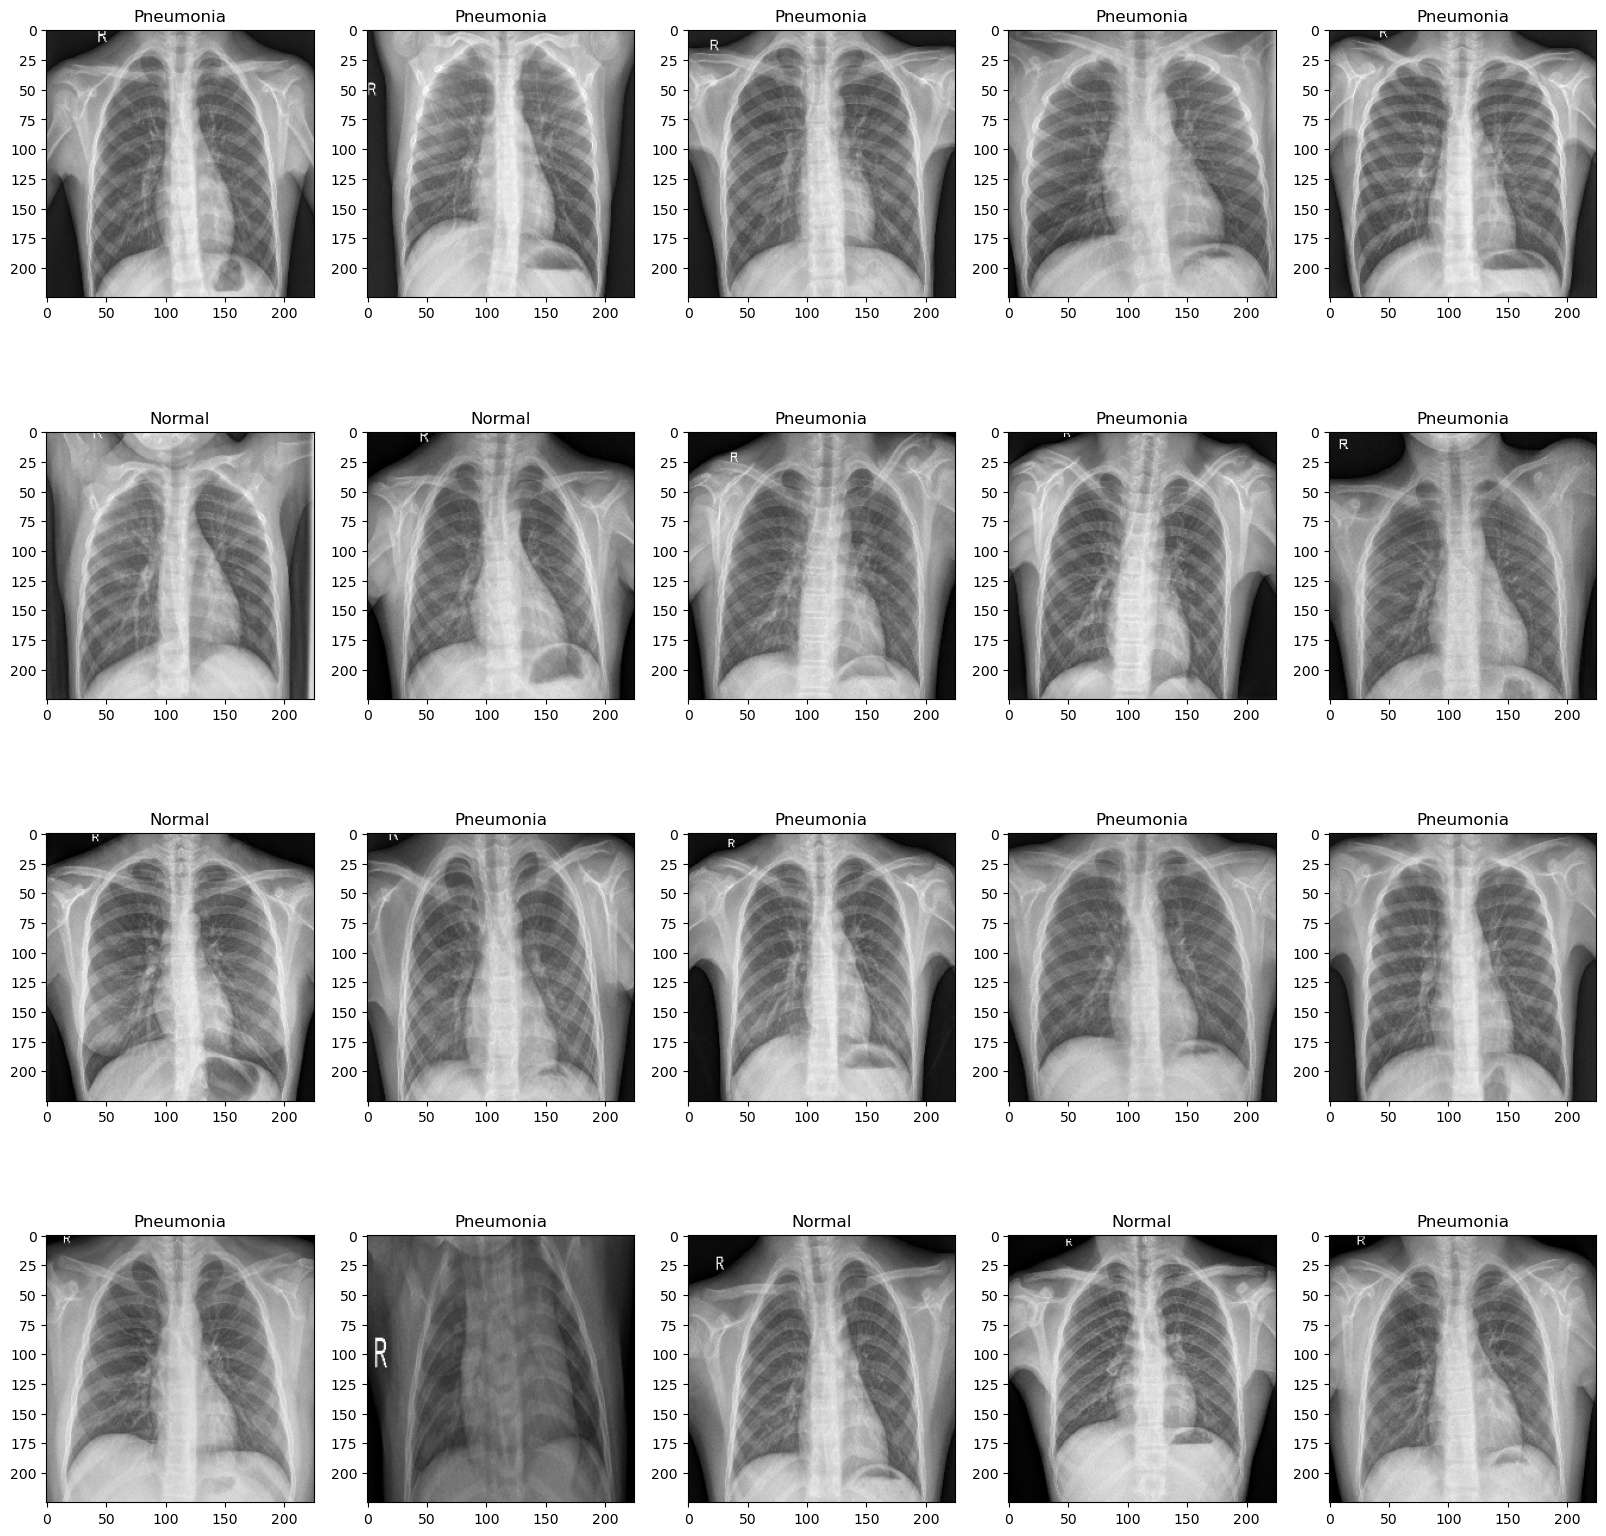

In [16]:
plt.figure(figsize=(20,20))
for i, (img , pred) in enumerate(zip(test_list, PREDS)):
    if i + 1 <= 20:
        plt.subplot(4, 5, i+1)
        if pred == 0:
            pred = 'Normal'
        elif pred == 1:
            pred = 'Pneumonia'

        plt.imshow(img), plt.title(pred)

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(225,225,3))
for layer in base_model.layers:
        layer.trainable = False
        
# pretrained_model.summary()
last_layer = base_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(2, activation='softmax')(x)           

model = Model(base_model.input, x) 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
                         metrics=["accuracy"])
model.summary() 

last layer of vgg : output shape:  (None, 7, 7, 512)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 225, 225, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 225, 225, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 225, 225, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3,  restore_best_weights=True)

# his = model.fit(X_train, y_train, epochs= 20,batch_size = 32, validation_data= (X_test, y_test), callbacks=[es])
model.fit(X_train, y_train, epochs= 20,batch_size = 32, validation_data= (X_test, y_test), callbacks=[es])

Epoch 1/20
163/163 [==============================] - 1940s 12s/step - loss: 0.2736 - accuracy: 0.9390 - val_loss: 0.9481 - val_accuracy: 0.7308
Epoch 2/20
163/163 [==============================] - 1846s 11s/step - loss: 0.0681 - accuracy: 0.9737 - val_loss: 0.6189 - val_accuracy: 0.8349
Epoch 3/20
163/163 [==============================] - 1944s 12s/step - loss: 0.0376 - accuracy: 0.9872 - val_loss: 0.7284 - val_accuracy: 0.8173
Epoch 4/20
163/163 [==============================] - 1680s 10s/step - loss: 0.0266 - accuracy: 0.9908 - val_loss: 1.1714 - val_accuracy: 0.7676
Epoch 5/20
163/163 [==============================] - 1948s 12s/step - loss: 0.0150 - accuracy: 0.9960 - val_loss: 1.2581 - val_accuracy: 0.7740


In [21]:
eval_results = model.evaluate(X_test, y_test)
print('Accuracy : ', eval_results[1]*100)

20/20 [==============================] - 166s 9s/step - loss: 0.6189 - accuracy: 0.8349
Accuracy :  83.49359035491943


In [22]:
model.predict(X_test[0].reshape(1, 225, 225, 3))

1/1 [==============================] - 0s 344ms/step


array([[0.04910414, 0.95089585]], dtype=float32)

In [23]:
preds = model.predict(X_test)
preds

20/20 [==============================] - 185s 10s/step


array([[4.9104054e-02, 9.5089591e-01],
       [1.3305527e-01, 8.6694467e-01],
       [3.5360408e-01, 6.4639592e-01],
       ...,
       [2.0334758e-09, 1.0000000e+00],
       [2.9654087e-08, 1.0000000e+00],
       [1.1777655e-05, 9.9998820e-01]], dtype=float32)

In [24]:
PREDS = np.argmax(np.round(preds), axis=1)

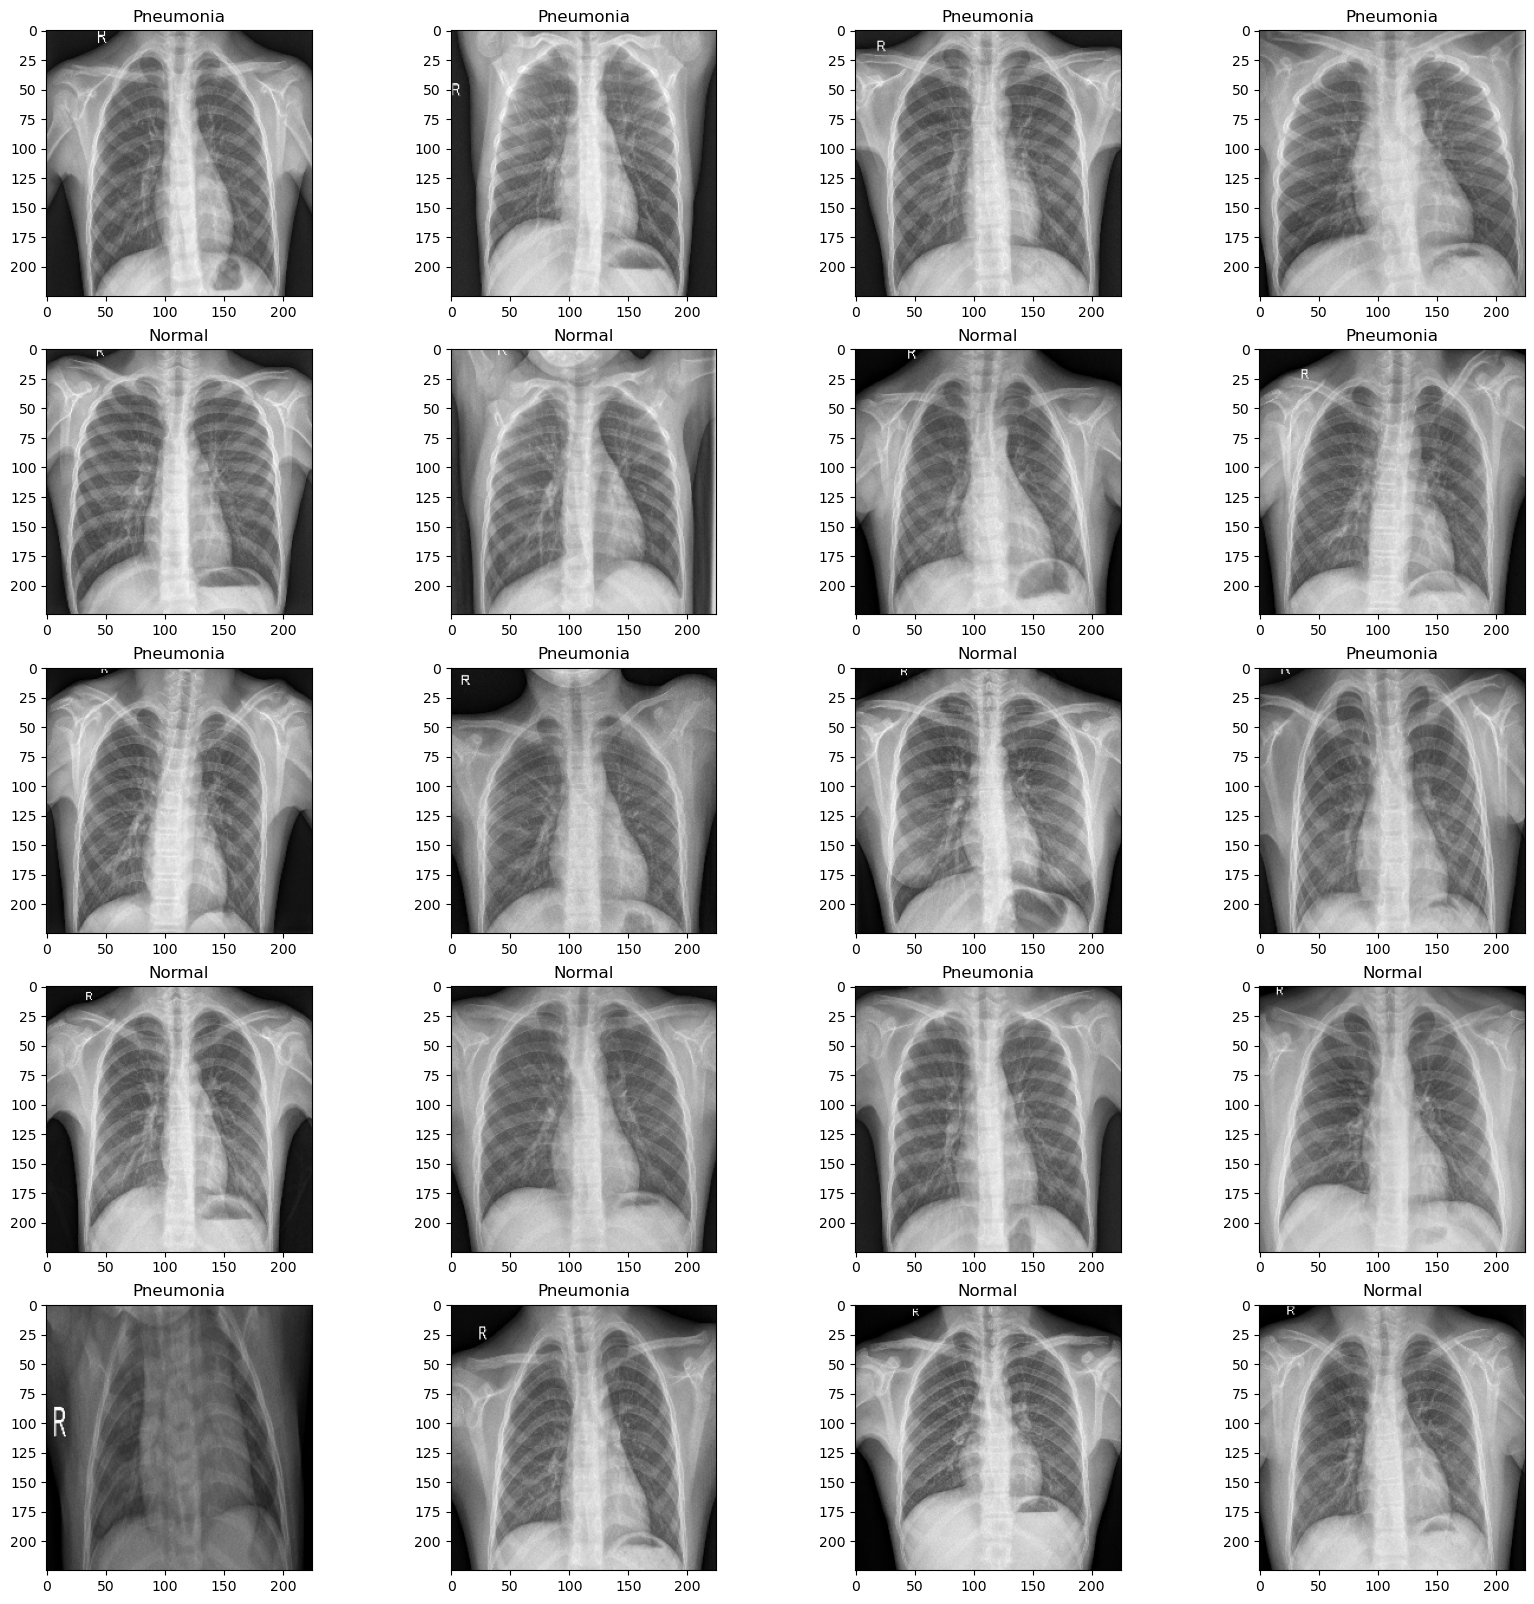

In [27]:
plt.figure(figsize=(20,20))
for i, (img , pred) in enumerate(zip(test_list, PREDS)):
    if i + 1 <= 20:
        plt.subplot(5, 4, i+1)
        if pred == 0:
            pred = 'Normal'
        elif pred == 1:
            pred = 'Pneumonia'

        plt.imshow(img), plt.title(pred)